In [103]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy import signal
import h5py, time

In [104]:
import sys
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile
from discharge_tools import *

In [26]:
%matplotlib notebook

In [27]:
Year = "2020"
Month = "01"
Day = "23"
BeadNumber =1
folder = r"/home/data_transfer/data_from_windows/"+ Year + Month + Day

In [453]:
fname = "/home/data_transfer/data_from_windows/Testdata/20200123/test_run2_1.h5"
folder_load = "/home/data_transfer/data_from_windows/Testdata/20200123/"
files = load_dir_sorted(folder_load,file_prefix="test_after_change11")
#fname = folder+"/NoBead"+"/InitialTest"+"/Data%d.h5" % Data_File_Number
print(fname)
#BDF = BeadDataFile.BeadDataFile(fname)

10  files in folder
10  files loaded
/home/data_transfer/data_from_windows/Testdata/20200123/test_run2_1.h5


In [454]:
timedifflist=[]
for i in range(len(files)):
    timedifflist.append((files[i].time[-1])/1e9)

<IPython.core.display.Javascript object>


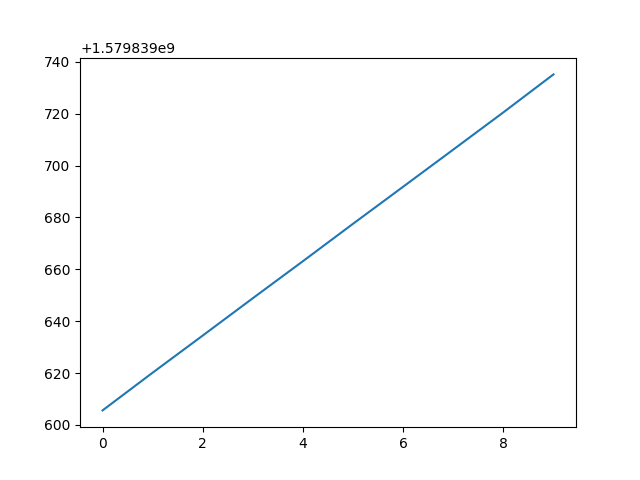

In [455]:
plt.plot(timedifflist)

In [456]:
files[-1].time[-1]/1e9

1579839735.17361

In [457]:
files[0].time[-1]/1e9

1579839605.6018007

In [458]:
(files[-1].time[-1]-files[0].time[0])/1e9

139.571486394

In [72]:
#Data_File_Number=4
#name = folder+"/Bead"+str(BeadNumber)+"/Shaking/Height_Determination"+"/Oscillating%d_8.h5" % Data_File_Number
#fname = folder+"/NoBead"+"/InitialTest"+"/Data%d.h5" % Data_File_Number
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)


/home/data_transfer/data_from_windows/Testdata/20200123/test_run2_1.h5


In [73]:
BDF.time[0]

1579819186851141453

In [74]:
BDF.time[-1]

1579819196850718741

In [75]:
(BDF.time[-1]-BDF.time[0])/1e9

9.999577288

In [47]:
(1579822050177050094-1579821017948717590)/1e9


1032.228332504

In [48]:
(1579820600825649115-1579819172499461097)/1e9


1428.326188018

<IPython.core.display.Javascript object>


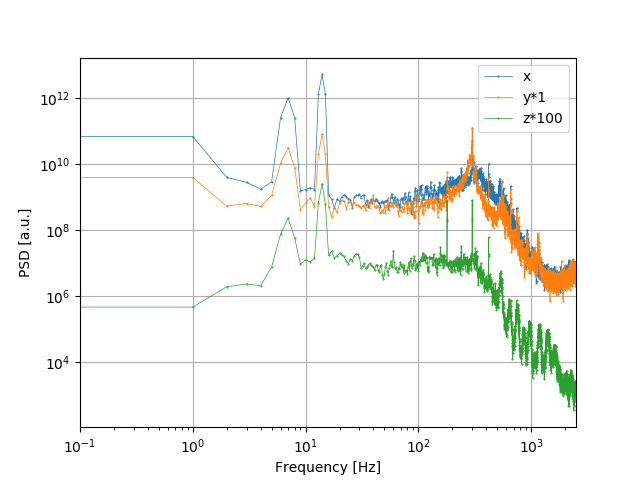

14.0 maximum x
300.0 maximum y
1334885.893978711 minimum x
680364.5190215145 minimum y
/home/data_transfer/data_from_windows/20200121/Bead1/InitialTest/Data4.png


In [35]:
_,ax = plt.subplots()
ax.loglog(freqs, xpsd, '.-', label="x",markersize=1,linewidth=0.5)
ax.loglog(freqs, ypsd, '.-', label="y*1",markersize=1,linewidth=0.5)
ax.loglog(freqs, zpsd, '.-', label="z*100",markersize=1,linewidth=0.5)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(.1,2500)
#plt.ylim(1e2,5*np.max(ypsd))
plt.grid(True)
print(freqs[np.argmax(xpsd)], "maximum x")
print(freqs[np.argmax(ypsd)], "maximum y")
print(np.min(xpsd), "minimum x")
print(np.min(ypsd), "minimum y")

ofname=folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.png" % Data_File_Number
#ofname=folder+"/NoBead"+"/InitialTest"+"/Data%d.png" % Data_File_Number

print(ofname)
#ofname='../Documents/AkioK/Discharge%d.png' % Ndata
#ofname='../Documents/AkioK/TransFunc%d.png' % Ndata
#ofname='../Documents/AkioK/Shaking%d.png' % Ndata
plt.savefig(ofname, dpi =300)

In [21]:
Compare_File_1 = 0
Compare_File_2 = 3

fname_1 = folder+"/Bead"+str(BeadNumber)+"/Shaking/Height_Determination"+"/Oscillating%d_0.h5" % Compare_File_1
fname_2 = folder+"/Bead"+str(BeadNumber)+"/Shaking/Height_Determination"+"/Oscillating%d_0.h5" % Compare_File_2
#fname_1 = folder+"/NoBead"+"/InitialTest"+"/Data%d.h5" % Compare_File_1
#fname_2 = folder+"/NoBead"+"/InitialTest"+"/Data%d.h5" % Compare_File_2

res = 2**12

In [22]:
BDF = BeadDataFile.BeadDataFile(fname_1)
data1 = BDF.xyz
res=50000
data_det1=signal.detrend(data1)
xpsd1, freqs1 = matplotlib.mlab.psd(data_det1[0], Fs = fsamp, NFFT = res)
ypsd1, freqs1 = matplotlib.mlab.psd(data_det1[1], Fs = fsamp, NFFT = res)
zpsd1, freqs1 = matplotlib.mlab.psd(data_det1[2], Fs = fsamp, NFFT = res)

BDF = BeadDataFile.BeadDataFile(fname_2)
data2 = BDF.xyz
data_det2=signal.detrend(data2)
xpsd2, freqs2 = matplotlib.mlab.psd(data_det2[0], Fs = fsamp, NFFT = res)
ypsd2, freqs2 = matplotlib.mlab.psd(data_det2[1], Fs = fsamp, NFFT = res)
zpsd2, freqs2 = matplotlib.mlab.psd(data_det2[2], Fs = fsamp, NFFT = res)


<IPython.core.display.Javascript object>


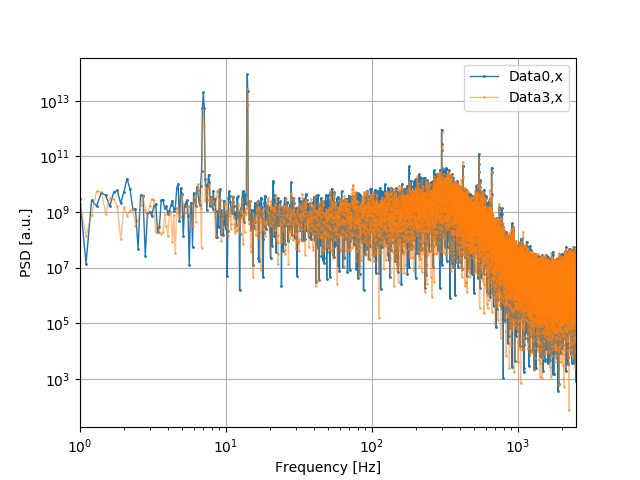

In [23]:
_,ax = plt.subplots()
label1='Data%d,x' % Compare_File_1
label2='Data%d,x' % Compare_File_2
ax.loglog(freqs1, xpsd1, '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, xpsd2, '.-', label=label2,markersize=2,linewidth=1,alpha=0.5)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(1,2500)
#plt.ylim(1e5,1e10)
plt.grid(True)

#ofname='../Documents/AkioK/Data%d.png' % Ndata
#ofname='../Documents/AkioK/Discharge%d.png' % Ndata
#ofname='../Documents/AkioK/TransFunc%d.png' % Ndata
#ofname='../Documents/AkioK/Shaking%d.png' % Ndata

#plt.savefig(ofname)

<IPython.core.display.Javascript object>


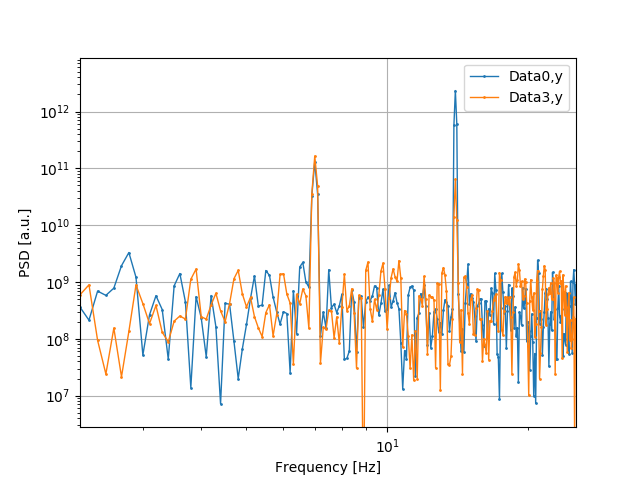

In [24]:
_,ax = plt.subplots()
label1='Data%d,y' % Compare_File_1
label2='Data%d,y' % Compare_File_2
ax.loglog(freqs1, ypsd1, '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, ypsd2, '.-', label=label2,markersize=2,linewidth=1)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(1,2500)
#plt.ylim(1e5,1e10)
plt.grid(True)
#ofname='/home/analysis_user/Results/Plots/20190724/NoBead/NoiseTest/PlotDataX%d_%d.png' %(Ndata1, Ndata2)
#plt.savefig(ofname)

<IPython.core.display.Javascript object>


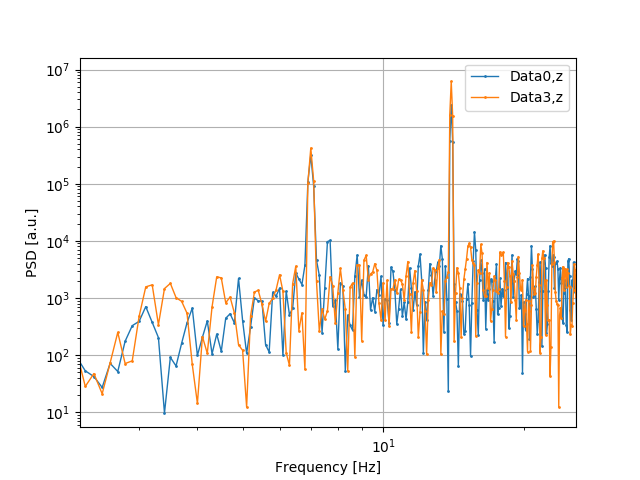

In [25]:
_,ax = plt.subplots()
label1='Data%d,z' % Compare_File_1
label2='Data%d,z' % Compare_File_2
ax.loglog(freqs1, zpsd1, '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, zpsd2, '.-', label=label2,markersize=2,linewidth=1)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')#plt.xlim(100,175)
#plt.ylim(1e5,1e10)
plt.grid(True)
#ofname='/home/analysis_user/Results/Plots/20190724/NoBead/NoiseTest/PlotDataX%d_%d.png' %(Ndata1, Ndata2)
#plt.savefig(ofname)